Optimal k for LOOCV-Brute:  21
Optimal k for LOOCV-Efficient:  17
    Number of Neighbors k  LOOCV-Brute Score  LOOCV-Efficient Score
0                       1           0.713483               0.949438
1                       2           0.553371               0.556180
2                       3           0.506242               0.496255
3                       4           0.459972               0.462781
4                       5           0.439101               0.424270
5                       6           0.431960               0.430556
6                       7           0.430291               0.424444
7                       8           0.415379               0.414063
8                       9           0.419961               0.416840
9                      10           0.403708               0.404775
10                     11           0.408673               0.407094
11                     12           0.389435               0.389786
12                     13           0.387873      

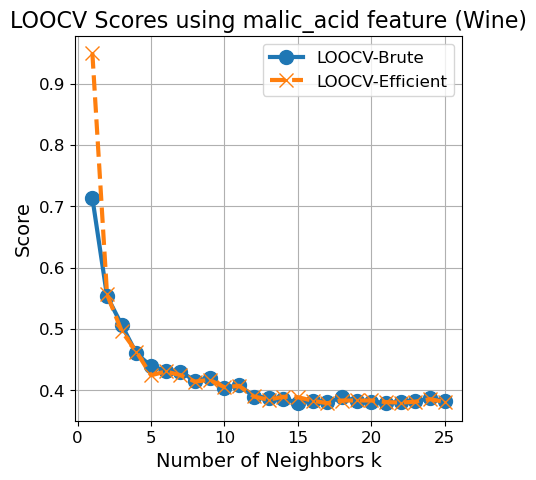

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load wine dataset
data = load_wine()
X = data.data[:, np.newaxis, 1]  # Selecting only the first feature (change index for different features)
y = data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n = len(X_scaled)  # Sample size
max_k = 2*int(np.sqrt(n))  # Maximum value for k based on the square root heuristic

# Test various numbers of neighbors, excluding the maximum k
k_range = range(1, max_k)
loo_scores_k = []
adjusted_scores_k = []

# Naive LOOCV score computation 
for k in k_range:
    scores_k = [] 
    for i in range(n):
        X_train = np.concatenate((X_scaled[:i], X_scaled[i+1:]))
        y_train = np.concatenate((y[:i], y[i+1:]))
        X_test = X_scaled[i:i+1]
        y_test = y[i:i+1]
        regressor_k = KNeighborsRegressor(n_neighbors=k, algorithm='kd_tree')
        regressor_k.fit(X_train, y_train)
        se_k = (y_test - regressor_k.predict(X_test)) ** 2
        scores_k.append(se_k.item())
    
    mse_k = np.mean(scores_k)
    loo_scores_k.append(mse_k)

# Efficient LOOCV score computation
for k in k_range:
    regressor_k_plus_1 = KNeighborsRegressor(n_neighbors=k+1, algorithm='kd_tree')
    regressor_k_plus_1.fit(X_scaled, y)
    y_pred_k_plus_1 = regressor_k_plus_1.predict(X_scaled)
    mse_k_plus_1 = (y - y_pred_k_plus_1) ** 2
    adjusted_score = np.mean(mse_k_plus_1) * ((k+1)**2 / k**2)
    adjusted_scores_k.append(adjusted_score)

# Create DataFrame for the results
results_df = pd.DataFrame({
    'Number of Neighbors k': list(k_range),
    'LOOCV-Brute Score': loo_scores_k,
    'LOOCV-Efficient Score': adjusted_scores_k  
})

# Find the optimal k for both methods
optimal_k_brute = k_range[np.argmin(loo_scores_k)]
optimal_k_efficient = k_range[np.argmin(adjusted_scores_k)]

# Display the results
print("Optimal k for LOOCV-Brute: ", optimal_k_brute)
print("Optimal k for LOOCV-Efficient: ", optimal_k_efficient)
print(results_df)

# Plot LOOCV-Brute and LOOCV-Efficient Scores
plt.figure(figsize=(5, 5))
plt.plot(list(k_range), loo_scores_k, marker='o', markersize=10, linewidth=3, label='LOOCV-Brute')
plt.plot(list(k_range), adjusted_scores_k, marker='x', markersize=10, linewidth=3, linestyle='--', label='LOOCV-Efficient')
plt.title('LOOCV Scores using malic_acid feature (Wine)', fontsize=16)
plt.xlabel('Number of Neighbors k', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.grid(True)
plt.show()
